In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, roc_curve

In [2]:
df = pd.read_csv("~/data/TrainingValidationData_320k_vs_80k_shuffle.csv", header = None, sep='\n')
df = df[0].str.split(';|,', expand=True)

In [3]:
df = df.fillna(0)

In [4]:
n_obj = (len(df.columns) - 5) // 5       
print("n_obj =", n_obj)
df = df.drop(range(5 + 5 * n_obj, len(df.columns)), axis = 'columns') # Drop the empty column at the end

n_obj = 19


In [5]:
df.head(10)

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,21,ttbar,1,19592.4,-0.0410686,b,431384,247371,-1.15222,1.84686,...,0,0,0,0,0,0,0,0,0,0
1,21,ttbar,1,34361.5,-2.39277,b,104553,50546.8,1.34776,2.99585,...,0,0,0,0,0,0,0,0,0,0
2,21,ttbar,1,24356,-0.260029,j,255675,73086.1,1.92294,-1.81685,...,0,0,0,0,0,0,0,0,0,0
3,21,ttbar,1,36565.7,-0.666041,b,131526,78025.7,1.10913,-3.06327,...,0,0,0,0,0,0,0,0,0,0
4,21,ttbar,1,8966.28,-1.89928,j,185195,79061,-1.49199,0.682821,...,0,0,0,0,0,0,0,0,0,0
5,21,ttbar,1,23917.4,1.69316,b,74494.2,52650,0.869359,1.74075,...,0,0,0,0,0,0,0,0,0,0
6,21,ttbar,1,25571.3,-2.39031,j,158001,134569,0.565989,-0.573557,...,0,0,0,0,0,0,0,0,0,0
7,21,ttbar,1,19804.2,0.81136,j,145088,111437,0.736566,2.51313,...,0,0,0,0,0,0,0,0,0,0
8,21,ttbar,1,62962.5,0.886331,b,166871,146545,-0.487993,-1.11008,...,0,0,0,0,0,0,0,0,0,0
9,21,ttbar,1,27831.8,-2.6922,j,269994,138348,1.27167,-1.45395,...,0,0,0,0,0,0,0,0,0,0


In [6]:
# Make column headers so we can call them something meaningful
heads = ['EventID', 'ProcessID', 'evtweight', 'MET', 'METphi']
for i in range (n_obj):
  heads.append('obj%d' % i)
  heads.append('obj%d_E' % i)
  heads.append('obj%d_pt' % i)
  heads.append('obj%d_eta' % i)
  heads.append('obj%d_phi' % i)
df.columns = df.columns[:0].tolist() + heads # Set the DataFrame column names to headers

process_mapping = { 'ttbar': 0, '4top': 1} 
df['ProcessID'] = df['ProcessID'].map(process_mapping) # Map 'ttbar' to 0, and '4top' to 1

In [7]:
df.columns

Index(['EventID', 'ProcessID', 'evtweight', 'MET', 'METphi', 'obj0', 'obj0_E',
       'obj0_pt', 'obj0_eta', 'obj0_phi', 'obj1', 'obj1_E', 'obj1_pt',
       'obj1_eta', 'obj1_phi', 'obj2', 'obj2_E', 'obj2_pt', 'obj2_eta',
       'obj2_phi', 'obj3', 'obj3_E', 'obj3_pt', 'obj3_eta', 'obj3_phi', 'obj4',
       'obj4_E', 'obj4_pt', 'obj4_eta', 'obj4_phi', 'obj5', 'obj5_E',
       'obj5_pt', 'obj5_eta', 'obj5_phi', 'obj6', 'obj6_E', 'obj6_pt',
       'obj6_eta', 'obj6_phi', 'obj7', 'obj7_E', 'obj7_pt', 'obj7_eta',
       'obj7_phi', 'obj8', 'obj8_E', 'obj8_pt', 'obj8_eta', 'obj8_phi', 'obj9',
       'obj9_E', 'obj9_pt', 'obj9_eta', 'obj9_phi', 'obj10', 'obj10_E',
       'obj10_pt', 'obj10_eta', 'obj10_phi', 'obj11', 'obj11_E', 'obj11_pt',
       'obj11_eta', 'obj11_phi', 'obj12', 'obj12_E', 'obj12_pt', 'obj12_eta',
       'obj12_phi', 'obj13', 'obj13_E', 'obj13_pt', 'obj13_eta', 'obj13_phi',
       'obj14', 'obj14_E', 'obj14_pt', 'obj14_eta', 'obj14_phi', 'obj15',
       'obj15_E', 'obj15_p

In [8]:
df.head(10)

,EventID,ProcessID,evtweight,MET,METphi,obj0,obj0_E,obj0_pt,obj0_eta,obj0_phi,...,obj17,obj17_E,obj17_pt,obj17_eta,obj17_phi,obj18,obj18_E,obj18_pt,obj18_eta,obj18_phi
0,21,0,1,19592.4,-0.0410686,b,431384,247371,-1.15222,1.84686,...,0,0,0,0,0,0,0,0,0,0
1,21,0,1,34361.5,-2.39277,b,104553,50546.8,1.34776,2.99585,...,0,0,0,0,0,0,0,0,0,0
2,21,0,1,24356,-0.260029,j,255675,73086.1,1.92294,-1.81685,...,0,0,0,0,0,0,0,0,0,0
3,21,0,1,36565.7,-0.666041,b,131526,78025.7,1.10913,-3.06327,...,0,0,0,0,0,0,0,0,0,0
4,21,0,1,8966.28,-1.89928,j,185195,79061,-1.49199,0.682821,...,0,0,0,0,0,0,0,0,0,0
5,21,0,1,23917.4,1.69316,b,74494.2,52650,0.869359,1.74075,...,0,0,0,0,0,0,0,0,0,0
6,21,0,1,25571.3,-2.39031,j,158001,134569,0.565989,-0.573557,...,0,0,0,0,0,0,0,0,0,0
7,21,0,1,19804.2,0.81136,j,145088,111437,0.736566,2.51313,...,0,0,0,0,0,0,0,0,0,0
8,21,0,1,62962.5,0.886331,b,166871,146545,-0.487993,-1.11008,...,0,0,0,0,0,0,0,0,0,0
9,21,0,1,27831.8,-2.6922,j,269994,138348,1.27167,-1.45395,...,0,0,0,0,0,0,0,0,0,0


# Now that we have the data-set in the form we want it in, here's the task for you. 

1. Plot a histogram showing the distribution of any kinematic variable, of 'obj1', for example the 'pt'.
2. Separate this into "signal" and "background" contributions by using the processID and the DataFrame filtering 
3. Plot the signal (4-top==1) and background (ttbar==0) distributions on the same histogram figure.
4. Make a cut, and evaluate the confusion matrix for this cut.
5. Make multiple cuts, and plot the ROC of the distribution.




### Plot a histogram showing the distribution of any kinematic variable, of 'obj1', for example the 'pt'.

In [9]:
obj1_pt = np.array(df["obj1_pt"].astype(float))


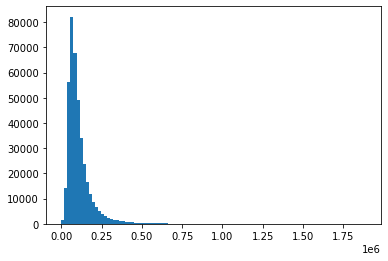

In [10]:

n, bins, patches = plt.hist(obj1_pt , 100)
plt.show()

### Separate this into "signal" and "background" contributions by using the processID and the DataFrame filtering 

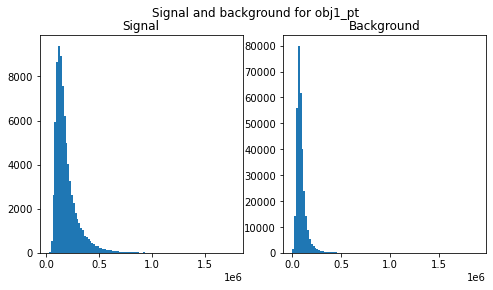

In [11]:
background = df[df['ProcessID'] == 0]
signal = df[df['ProcessID'] == 1]

fig, ax = plt.subplots(1,2)
fig.suptitle("Signal and background for obj1_pt")
fig.set_figwidth(8)

ax[0].set_title("Signal")
_,_,_ = ax[0].hist(signal["obj1_pt"].astype(float), bins=100)

ax[1].set_title("Background")
_,_,_ = ax[1].hist(background["obj1_pt"].astype(float), bins=100)


In [12]:
len(signal[signal["obj1_pt"].astype(float) > 10**6])

58

In [13]:
len(background[background["obj1_pt"].astype(float) > 10**6])

15